# Jonathan Halverson
# Tuesday, February 14, 2017
# Part 1: Overview of the fighter table

In this notebook we inspect the figher data scraped from FightMetric.com.

Note that the fighter records include non-UFC fights. Some fighters have more losses than wins. Some fighters do not have all their professional MMA fights included in their records. Some never fought in the UFC. We avoid detailed analysis of weight because fighters often change weight class and it is not known what their weight was for each fighter.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('halverson')
%matplotlib inline

In [2]:
df = pd.read_csv('data/fightmetric_fighters/fightmetric_fighters_CLEAN_3-6-2017.csv', header=0, parse_dates=['Dob'])
df['Age'] = (pd.to_datetime('today') - df.Dob) / np.timedelta64(1, 'Y')
df.Age = df.Age.apply(lambda x: round(x, 1))
#pd.set_option('display.max_rows', 3000)
df.head(10)

,Name,Nickname,Dob,Age,Weight,Height,Reach,Stance,Win,Loss,Draw
0,Tom Aaron,NaN,1978-07-13,38.6,155.0,NaN,NaN,NaN,5.0,3.0,0.0
1,Danny Abbadi,The Assassin,1983-07-03,33.7,155.0,71.0,NaN,Orthodox,4.0,6.0,0.0
2,David Abbott,Tank,NaT,NaN,265.0,72.0,NaN,Switch,10.0,14.0,0.0
3,Shamil Abdurakhimov,Abrek,1981-09-02,35.5,235.0,75.0,76.0,Orthodox,16.0,4.0,0.0
4,Hiroyuki Abe,Abe Ani,NaT,NaN,145.0,66.0,NaN,Orthodox,8.0,14.0,3.0
5,Papy Abedi,Makambo,1978-06-30,38.7,185.0,71.0,74.0,Southpaw,9.0,3.0,0.0
6,Ricardo Abreu,Demente,1984-04-27,32.9,185.0,71.0,73.0,Orthodox,5.0,3.0,0.0
7,Daniel Acacio,NaN,1977-12-27,39.2,180.0,68.0,NaN,Orthodox,26.0,12.0,0.0
8,Scott Adams,NaN,NaT,NaN,225.0,72.0,NaN,Southpaw,8.0,1.0,0.0
9,Sam Adkins,The Experience,1965-04-26,51.9,225.0,75.0,NaN,Orthodox,7.0,20.0,2.0


### What are the data types and number of non-null values for each column?

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2832 entries, 0 to 2831
Data columns (total 11 columns):
Name        2832 non-null object
Nickname    1447 non-null object
Dob         2106 non-null datetime64[ns]
Age         2106 non-null float64
Weight      2757 non-null float64
Height      2573 non-null float64
Reach       1207 non-null float64
Stance      2021 non-null object
Win         2832 non-null float64
Loss        2832 non-null float64
Draw        2831 non-null float64
dtypes: datetime64[ns](1), float64(7), object(3)
memory usage: 243.4+ KB


### How many fighters are in the database?

In [4]:
df.shape[0]

2832

### What are the min and max values of the numerical columns?

In [5]:
df.describe().applymap(lambda x: round(x, 2))

,Age,Weight,Height,Reach,Win,Loss,Draw
count,2106.00,2757.00,2573.00,1207.00,2832.00,2832.00,2831.00
mean,35.41,176.14,70.50,71.88,11.38,5.25,0.31
std,6.38,40.42,3.36,4.02,9.16,4.82,0.90
min,20.90,105.00,60.00,60.00,0.00,0.00,0.00
25%,30.80,149.00,68.00,69.00,5.00,2.00,0.00
50%,34.60,170.00,71.00,72.00,10.00,4.00,0.00
75%,39.10,195.00,73.00,75.00,16.00,7.00,0.00
max,74.10,770.00,89.00,84.00,127.00,74.00,11.00


### What are the oldest and youngest birthdays?

In [6]:
min(df.Dob), max(df.Dob)

(Timestamp('1943-01-25 00:00:00'), Timestamp('1996-04-21 00:00:00'))

### What are the most common birthdays?

In [7]:
df[pd.notnull(df.Dob)].Dob.apply(lambda x: (x.month, x.day)).value_counts()[:5]

(7, 14)    17
(7, 16)    17
(8, 4)     16
(9, 22)    15
(8, 24)    12
Name: Dob, dtype: int64

### Any leap-year birthdays?

In [8]:
df[(df.Dob.dt.month == 2) & (df.Dob.dt.day == 29)]

,Name,Nickname,Dob,Age,Weight,Height,Reach,Stance,Win,Loss,Draw
487,Patrick Cote,The Predator,1980-02-29,37.0,170.0,71.0,71.0,Orthodox,24.0,10.0,0.0


### How many fighters were born in each month?

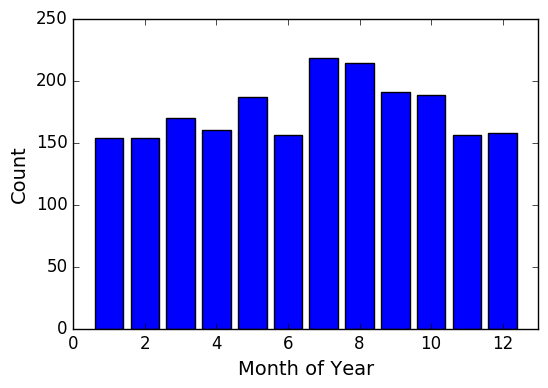

In [9]:
bd_counts = df[pd.notnull(df.Dob)].Dob.dt.month.value_counts()
plt.bar(bd_counts.index, bd_counts.values, align='center')
plt.xlim(0, 13)
plt.xlabel('Month of Year')
plt.ylabel('Count')

### Who are the 5 youngest fighters?

In [10]:
df[pd.notnull(df.Dob)].sort_values('Dob', ascending=False).head(5)

,Name,Nickname,Dob,Age,Weight,Height,Reach,Stance,Win,Loss,Draw
2019,Claudio Puelles,El Nino,1996-04-21,20.9,155.0,71.0,72.0,Southpaw,8.0,2.0,0.0
1825,Sage Northcutt,Super,1996-03-01,21.0,170.0,72.0,71.0,Orthodox,8.0,2.0,0.0
1480,Veronica Macedo,NaN,1995-10-30,21.4,135.0,64.0,64.0,Southpaw,5.0,1.0,1.0
2049,Ricardo Ramos,NaN,1995-08-01,21.6,135.0,69.0,72.0,Orthodox,10.0,1.0,0.0
1636,Alonzo Menifield,NaN,1994-10-18,22.4,205.0,73.0,NaN,NaN,1.0,0.0,0.0


### Do any fighters have the same name?

In [11]:
name_counts = df.Name.value_counts()
name_counts[name_counts > 1]

Series([], Name: Name, dtype: int64)

In [12]:
df[(df.Name == 'Michael McDonald') | (df.Name == 'Tony Johnson') | (df.Name == 'Dong Hyun Kim')]

,Name,Nickname,Dob,Age,Weight,Height,Reach,Stance,Win,Loss,Draw
1189,Tony Johnson,NaN,NaT,NaN,185.0,NaN,NaN,NaN,4.0,2.0,0.0
1276,Dong Hyun Kim,Stun Gun,1981-11-17,35.3,170.0,74.0,76.0,Southpaw,22.0,3.0,1.0
1590,Michael McDonald,Mayday,1991-01-15,26.1,135.0,69.0,70.0,Orthodox,17.0,4.0,0.0


There are three pairs of fighters with the same name.

In [13]:
# rename the second instance
idx = df[(df.Name == 'Tony Johnson') & (df.Weight == 265)].index.values
df = df.set_value(idx, 'Name', 'Tony Johnson 2')

In [14]:
# rename the second instance
idx = df[(df.Name == 'Dong Hyun Kim') & (df.Nickname == 'Maestro')].index.values
df = df.set_value(idx, 'Name', 'Dong Hyun Kim 2')

In [15]:
# rename the second instance
idx = df[(df.Name == 'Michael McDonald') & (df.Nickname == 'The Black Sniper')].index.values
df = df.set_value(idx, 'Name', 'Michael McDonald 2')

In [16]:
name_counts = df.Name.value_counts()
name_counts[name_counts > 1]

Series([], Name: Name, dtype: int64)

### Any names with two consectutive spaces?

In [17]:
df[df.Name.str.contains('  ')][['Name']]

,Name


### Any names with non-alphabetical characters

In [18]:
df[df.Name.apply(lambda x: not ''.join(x.split()).isalpha())][['Name']]

,Name
18,Razak Al-Hassan
19,Mostapha Al-Turk
109,Olivier Aubin-Mercier
310,Nah-Shon Burrell
352,Dos Caras Jr.
360,Don Carlo-Clauss
522,Sarah D'alelio
660,Abdul-Kerim Edilov
695,Chel Erwin-Davis
709,Ashlee Evans-Smith


### How many names do not have two pieces?

In [19]:
pd.set_option('display.max_rows', 100)
df[df.Name.apply(lambda x: len(x.split()) != 2)][['Name']]

,Name
38,Marcio Alexandre Junior
136,Tae Hyun Bang
251,Ebenezer Fontes Braga
300,Lee Kwan Bum
352,Dos Caras Jr.
361,Antonio Carlos Junior
413,Mu Bae Choi
414,Hong Man Choi
434,Heather Jo Clark
523,Marcos da Matta


### How does fighter height vary with weight?

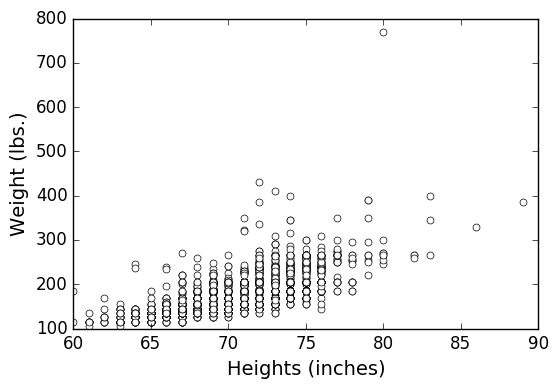

In [20]:
plt.plot(df.Height, df.Weight, 'wo')
plt.xlabel('Heights (inches)')
plt.ylabel('Weight (lbs.)')

### Who are the heaviest fighters?

In [21]:
df.dropna(subset=['Weight']).sort_values('Weight', ascending=False).head(5)

,Name,Nickname,Dob,Age,Weight,Height,Reach,Stance,Win,Loss,Draw
2790,Emmanuel Yarborough,NaN,1960-09-05,56.5,770.0,80.0,NaN,Open Stance,1.0,2.0,0.0
2595,Teila Tuli,NaN,1969-06-14,47.7,430.0,72.0,NaN,Orthodox,0.0,1.0,0.0
2041,Thomas Ramirez,NaN,NaT,NaN,410.0,73.0,NaN,Sideways,0.0,1.0,0.0
1568,John Matua,NaN,NaT,NaN,400.0,74.0,NaN,Orthodox,1.0,4.0,0.0
1972,Cory Peterson,LA Giant,NaT,NaN,400.0,83.0,NaN,Orthodox,2.0,1.0,0.0


### Who are the tallest fighters?

In [22]:
df.dropna(subset=['Height']).sort_values('Height', ascending=False).head(5)

,Name,Nickname,Dob,Age,Weight,Height,Reach,Stance,Win,Loss,Draw
2340,Paulo Cesar Silva,Giant,1963-07-21,53.6,385.0,89.0,NaN,Orthodox,2.0,6.0,0.0
414,Hong Man Choi,Techno Goliath,1980-10-30,36.3,330.0,86.0,NaN,Orthodox,2.0,3.0,0.0
1972,Cory Peterson,LA Giant,NaT,NaN,400.0,83.0,NaN,Orthodox,2.0,1.0,0.0
1203,Nathan Jones,NaN,1970-08-21,46.5,345.0,83.0,NaN,Orthodox,0.0,1.0,0.0
2469,Stefan Struve,Skyscraper,1988-02-18,29.0,265.0,83.0,84.0,Orthodox,32.0,8.0,0.0


### What is the distriubtion of fighter reach?

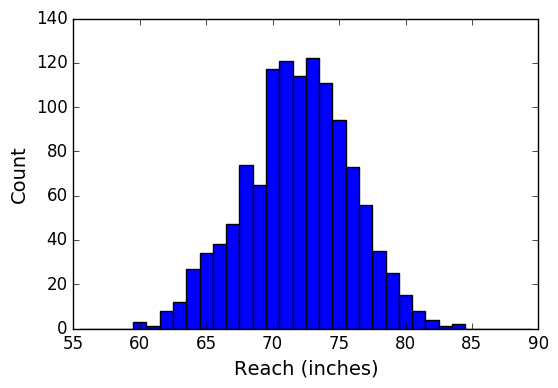

In [23]:
counts, edges, patches = plt.hist(df.Reach.dropna(), bins=np.arange(55.5, 90.5, 1.0))
patches[0].set_snap(True)
plt.xlabel('Reach (inches)')
plt.ylabel('Count')

### Which fighters have the longest reach?

In [24]:
df[pd.notnull(df.Reach)].sort_values('Reach', ascending=False).head(5)

,Name,Nickname,Dob,Age,Weight,Height,Reach,Stance,Win,Loss,Draw
2469,Stefan Struve,Skyscraper,1988-02-18,29.0,265.0,83.0,84.0,Orthodox,32.0,8.0,0.0
1202,Jon Jones,Bones,1987-07-19,29.6,205.0,76.0,84.0,Orthodox,22.0,1.0,0.0
1798,Francis Ngannou,The Predator,1986-09-05,30.5,250.0,76.0,83.0,Orthodox,10.0,1.0,0.0
1190,Lavar Johnson,Big,1977-06-11,39.7,240.0,76.0,82.0,Orthodox,17.0,7.0,0.0
555,Philip De Fries,NaN,1986-04-21,30.9,250.0,77.0,82.0,Orthodox,9.0,3.0,0.0


(55, 90)

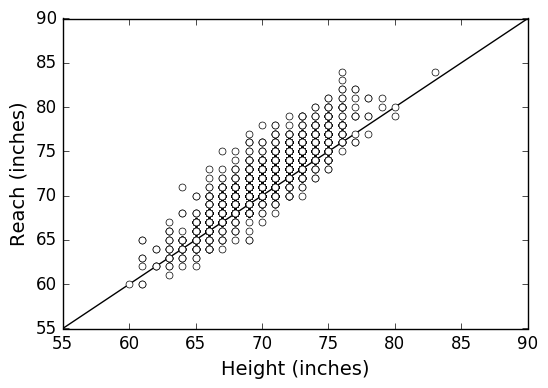

In [25]:
plt.plot([55, 90], [55, 90], 'k-')
plt.plot(df.Height, df.Reach, 'wo')
plt.xlabel('Height (inches)')
plt.ylabel('Reach (inches)')
plt.xlim(55, 90)
plt.ylim(55, 90)

### Cleaning is complete so write the dataframe

In [26]:
today = pd.to_datetime('today').to_pydatetime()
date = '-'.join(map(str, [today.month, today.day, today.year]))
cols = ['Name', 'Nickname', 'Dob', 'Age', 'Weight', 'Height', 'Reach', 'Stance', 'Win', 'Loss', 'Draw']
df[cols].to_csv('data/fightmetric_fighters/fightmetric_fighters_CLEAN_' + date + '.csv', index=False)

### Which fighters have the largest reach-to-height ratio?

In [27]:
df['ReachHeight'] = df.Reach / df.Height
df.drop(['Nickname', 'Name'], axis=1).dropna(subset=['Reach', 'Height']).sort_values('ReachHeight', ascending=False).head(10)

,Dob,Age,Weight,Height,Reach,Stance,Win,Loss,Draw,ReachHeight
558,1991-03-12,26.0,155.0,67.0,75.0,Orthodox,8.0,3.0,1.0,1.119403
1394,1992-09-04,24.5,155.0,69.0,77.0,Orthodox,14.0,2.0,0.0,1.115942
2395,1984-04-18,32.9,205.0,70.0,78.0,Orthodox,12.0,10.0,0.0,1.114286
262,1985-04-06,31.9,135.0,64.0,71.0,Southpaw,7.0,5.0,0.0,1.109375
1358,1992-04-08,24.9,135.0,66.0,73.0,Southpaw,11.0,2.0,0.0,1.106061
1202,1987-07-19,29.6,205.0,76.0,84.0,Orthodox,22.0,1.0,0.0,1.105263
217,1981-10-24,35.4,155.0,68.0,75.0,Orthodox,12.0,5.0,0.0,1.102941
528,1983-02-21,34.0,170.0,69.0,76.0,Orthodox,31.0,11.0,2.0,1.101449
759,1984-01-07,33.2,155.0,69.0,76.0,Orthodox,7.0,3.0,0.0,1.101449
2570,1981-01-18,36.1,135.0,69.0,76.0,Orthodox,39.0,5.0,0.0,1.101449


### Which fighters have the smallest reach-to-height ratio?

In [28]:
df.drop(['Nickname', 'Name'], axis=1).dropna(subset=['Reach', 'Height']).sort_values('ReachHeight', ascending=True).head(10)

,Dob,Age,Weight,Height,Reach,Stance,Win,Loss,Draw,ReachHeight
1443,1986-11-08,30.3,145.0,69.0,65.0,Southpaw,14.0,12.0,1.0,0.942029
1494,1981-04-08,35.9,155.0,69.0,65.0,Orthodox,11.0,3.0,0.0,0.942029
807,1989-12-29,27.2,135.0,65.0,62.0,Orthodox,10.0,6.0,1.0,0.953846
1214,1985-10-04,31.4,115.0,67.0,64.0,Orthodox,6.0,4.0,0.0,0.955224
824,1991-07-07,25.7,135.0,68.0,65.0,Orthodox,11.0,0.0,0.0,0.955882
2387,1982-08-17,34.6,135.0,69.0,66.0,Orthodox,9.0,7.0,1.0,0.956522
875,1986-03-31,30.9,135.0,70.0,67.0,Orthodox,10.0,4.0,0.0,0.957143
1475,1974-08-18,42.5,170.0,71.0,68.0,Orthodox,31.0,18.0,5.0,0.957746
1724,1979-12-16,37.2,135.0,73.0,70.0,NaN,2.0,1.0,0.0,0.958904
637,1989-08-04,27.6,135.0,63.0,61.0,Orthodox,11.0,5.0,0.0,0.968254


### Which fighters have the most fights?

In [29]:
df['Fights'] = df['Win'] + df['Loss'] + df['Draw']
df['WinRatio'] = df['Win'] / df['Fights']

In [30]:
df.sort_values('Fights', ascending=False).head(5).drop(['Nickname', 'Name'], axis=1)

,Dob,Age,Weight,Height,Reach,Stance,Win,Loss,Draw,ReachHeight,Fights,WinRatio
799,1977-05-29,39.8,240.0,72.0,NaN,Orthodox,127.0,49.0,10.0,NaN,186.0,0.682796
2307,1958-06-08,58.7,250.0,74.0,NaN,Southpaw,100.0,18.0,7.0,NaN,125.0,0.800000
2104,1970-09-27,46.4,190.0,69.0,NaN,Orthodox,47.0,74.0,0.0,NaN,121.0,0.388430
1089,1975-08-25,41.5,185.0,73.0,74.0,Orthodox,88.0,21.0,5.0,1.013699,114.0,0.771930
2066,NaT,NaN,205.0,NaN,NaN,Orthodox,43.0,52.0,1.0,NaN,96.0,0.447917


### Which fighters (with more than 15 fights) have the best win ratio?

In [31]:
df[df.Fights > 15].sort_values('WinRatio', ascending=False).head(5).drop(['Nickname', 'Name'], axis=1)

,Dob,Age,Weight,Height,Reach,Stance,Win,Loss,Draw,ReachHeight,Fights,WinRatio
1659,1979-02-20,38.0,185.0,71.0,NaN,Orthodox,16.0,0.0,0.0,NaN,16.0,1.000000
1833,1988-09-20,28.5,155.0,70.0,70.0,Orthodox,24.0,0.0,0.0,1.000000,24.0,1.000000
1794,1994-04-25,22.9,145.0,68.0,NaN,NaN,30.0,1.0,0.0,NaN,31.0,0.967742
2353,1985-06-22,31.7,135.0,67.0,68.0,Orthodox,24.0,1.0,0.0,1.014925,25.0,0.960000
1202,1987-07-19,29.6,205.0,76.0,84.0,Orthodox,22.0,1.0,0.0,1.105263,23.0,0.956522


### What is the distribution of win ratios?

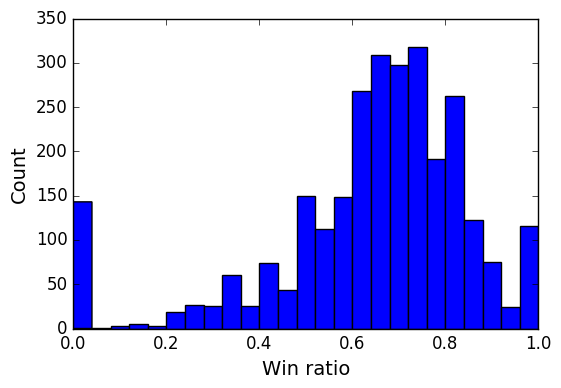

In [32]:
plt.hist(df.WinRatio.dropna(), bins=25)
plt.xlabel('Win ratio')
plt.ylabel('Count')

### How does win ratio vary with reach-to-height ratio (for fighters with more than 10 fights)?

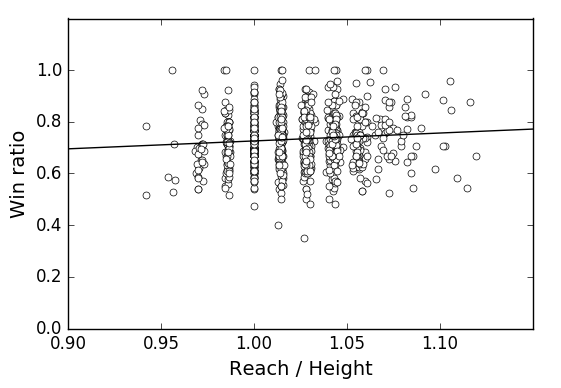

In [33]:
f10 = df[df.Fights > 10][['WinRatio', 'ReachHeight']].dropna()
m, b = np.polyfit(f10.ReachHeight.values, f10.WinRatio.values, 1)
plt.plot(f10.ReachHeight, f10.WinRatio, 'wo')
plt.plot(np.linspace(0.9, 1.15), m * np.linspace(0.9, 1.15) + b, 'k-')
plt.xlim(0.9, 1.15)
plt.ylim(0, 1.2)
plt.xlabel('Reach / Height')
plt.ylabel('Win ratio')

#### Statistical Test

In [34]:
from scipy.stats import pearsonr, spearmanr

corr_pearson, p_value_pearson = pearsonr(f10.ReachHeight, f10.WinRatio)
corr_spearman, p_value_spearman = spearmanr(f10.ReachHeight, f10.WinRatio)
print corr_pearson, p_value_pearson
print corr_spearman, p_value_spearman

0.0834931863553 0.00802894488485
0.0722699544644 0.0218185085266


We see that the correlation is small but statistically significant according to both measures.

### What are the different stances and how many fighters use them?

In [35]:
stance_overview = pd.DataFrame([df.Stance.value_counts(normalize=False), 100 * df.Stance.value_counts(normalize=True)]).T.applymap(lambda x: round(x, 2))
stance_overview.columns = ['Count', 'Percentage']
stance_overview.astype({'Count':int})

,Count,Percentage
Orthodox,1611,79.71
Southpaw,352,17.42
Switch,48,2.38
Open Stance,7,0.35
Sideways,3,0.15


### What are the average win ratio, height and reach for each stance?

In [36]:
df.groupby('Stance').agg({'WinRatio':[np.size, np.mean, np.std], 'Height':np.mean, 'Reach':np.mean})

Height      Reach WinRatio                    
                  mean       mean     size      mean       std
Stance                                                        
Open Stance  73.571429  74.500000      7.0  0.568526  0.159215
Orthodox     70.678436  71.998864   1611.0  0.653261  0.197109
Sideways     72.666667        NaN      3.0  0.388889  0.346944
Southpaw     70.381089  71.810680    352.0  0.668670  0.189263
Switch       71.104167  72.382353     48.0  0.703476  0.191147

### Is the win ratio of southpaws higher than that of orthodox (for fighters with more than 10 fights)?

In [37]:
f10_stance = df[df.Stance.isin(['Orthodox', 'Southpaw']) & (df.Fights > 10)]
stance = f10_stance.groupby('Stance').agg({'WinRatio':[np.mean, np.std], 'Height':[np.size, np.mean, np.std], 'Reach':[np.mean, np.std]})
stance.astype({('Height', 'size'):int}).applymap(lambda x: round(x, 3))

Height                  Reach        WinRatio       
            size    mean    std    mean    std     mean    std
Stance                                                        
Orthodox  1203.0  70.599  3.272  72.070  3.943    0.688  0.127
Southpaw   277.0  70.238  2.994  71.841  3.542    0.702  0.129

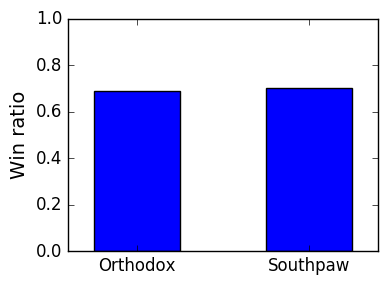

In [38]:
fig = plt.figure(1, figsize=(4, 3))
plt.bar(range(stance.shape[0]), stance[('WinRatio', 'mean')], width=0.5, tick_label=stance.index.values, align='center')
plt.ylim(0, 1)
plt.ylabel('Win ratio')

In [39]:
orthodox = f10_stance[(f10_stance.Stance == 'Orthodox')].WinRatio
southpaw = f10_stance[(f10_stance.Stance == 'Southpaw')].WinRatio

(0, 1.2)

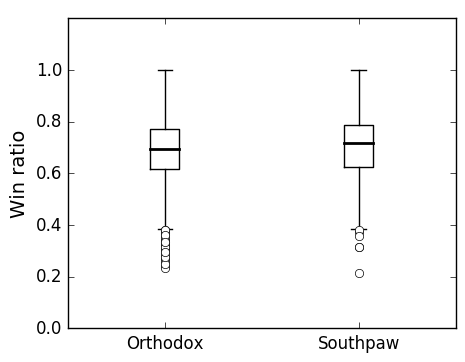

In [40]:
fig = plt.figure(1, figsize=(5, 4))
plt.boxplot([orthodox, southpaw], labels=['Orthodox', 'Southpaw'])
plt.ylabel('Win ratio')
plt.ylim(0, 1.2)

#### Statistical test

In [41]:
from scipy.stats import ttest_ind
t_stat, p_value = ttest_ind(orthodox, southpaw, equal_var=False)
print t_stat, p_value

-1.61546596369 0.106981987847


The statistical test shows that the difference in win ratios between the two classes is not significant.

#### Chi-square test manually

In [42]:
row_orthodox = df[(df.Stance == 'Orthodox') & (df.Fights > 10)][['Win', 'Loss']].sum()
row_southpaw = df[(df.Stance == 'Southpaw') & (df.Fights > 10)][['Win', 'Loss']].sum()

In [43]:
cont_table = pd.DataFrame([row_orthodox, row_southpaw], index=['Orthodox', 'Southpaw']).T
cont_table['Total'] = cont_table.sum(axis=1)
cont_table.loc['Total'] = cont_table.sum(axis=0)
cont_table

,Orthodox,Southpaw,Total
Win,19200.0,4865.0,24065.0
Loss,8512.0,1998.0,10510.0
Total,27712.0,6863.0,34575.0


In [44]:
cont_table.loc['Win', 'Orthodox'] / cont_table.loc['Total', 'Orthodox']

0.69284064665127021

In [45]:
cont_table.loc['Win', 'Southpaw'] / cont_table.loc['Total', 'Southpaw']

0.70887367040652771

In [46]:
win_ortho_expect = cont_table.loc['Win', 'Total'] * cont_table.loc['Total', 'Orthodox'] / cont_table.loc['Total', 'Total']
win_south_expect = cont_table.loc['Win', 'Total'] * cont_table.loc['Total', 'Southpaw'] / cont_table.loc['Total', 'Total']
los_ortho_expect = cont_table.loc['Loss', 'Total'] * cont_table.loc['Total', 'Orthodox'] / cont_table.loc['Total', 'Total']
los_south_expect = cont_table.loc['Loss', 'Total'] * cont_table.loc['Total', 'Southpaw'] / cont_table.loc['Total', 'Total']
expect = pd.DataFrame([[win_ortho_expect, win_south_expect], [los_ortho_expect, los_south_expect]], index=['Win', 'Loss'], columns=['Orthodox', 'Southpaw'])
expect

,Orthodox,Southpaw
Win,19288.193203,4776.806797
Loss,8423.806797,2086.193203


In [47]:
from scipy.stats import chi2

chi_sq = cont_table.iloc[0:2, 0:2].subtract(expect).pow(2).divide(expect).values.sum()
p_value = 1.0 - chi2.cdf(chi_sq, df=(2 - 1) * (2 - 1))
print chi_sq, p_value, p_value > 0.05

6.68322908653 0.00973241610474 False


#### Chi-square test using a software library

In [48]:
from scipy.stats import chi2_contingency

chi_sq, p_value, dof, expect = chi2_contingency(cont_table.iloc[0:2, 0:2].values, correction=False)
print chi_sq, p_value, p_value > 0.05

6.68322908653 0.00973241610474 False


We see that the null hypothesis of independence of stance is not supported. There is a statistically significant difference between the two stances. Note that the correction has been turned off even tough the number of degrees of freedom is one.